In [1]:
# Replace the first cell with this fixed code

import pandas as pd
import os

# Define the relative path to the data file
file_path = os.path.join('winequality-red-5.csv')
#file_path = os.path.join('data', 'winequality-red-5.csv')

# Try different approaches to read the file correctly
try:
    # First attempt with semicolon separator
    df = pd.read_csv(file_path, sep=';')
    
    # Check if we have multiple columns - if not, try another approach
    if df.shape[1] <= 1:
        print("First attempt gave only one column, trying alternative approach...")
        
        # Try reading the file directly with Python's built-in functions
        with open(file_path, 'r') as f:
            lines = f.readlines()
            
        # Get column names from first line
        header = lines[0].strip().split(';')
        
        # Create a new DataFrame from the data
        data = []
        for line in lines[1:]:
            values = line.strip().split(';')
            data.append(values)
            
        # Create DataFrame with the correct column names
        df = pd.DataFrame(data, columns=header)
        
        # Convert numeric columns to appropriate types
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col])
                print(f"Converted '{col}' to numeric type")
            except:
                print(f"Keeping '{col}' as string type")
                
    print(f"Successfully loaded {file_path}")
    print(f"DataFrame shape: {df.shape} (rows, columns)")
    print("\nColumn names:")
    for i, col in enumerate(df.columns):
        print(f"{i+1}. {col}")
    
    print("\nSample data (first 3 rows):")
    display(df.head(3))
    
except FileNotFoundError:
    print(f"Error: File not found at {os.path.abspath(file_path)}")
except Exception as e:
    print(f"An error occurred: {e}")

First attempt gave only one column, trying alternative approach...
Converted '"fixed acidity' to numeric type
Converted '""volatile acidity""' to numeric type
Converted '""citric acid""' to numeric type
Converted '""residual sugar""' to numeric type
Converted '""chlorides""' to numeric type
Converted '""free sulfur dioxide""' to numeric type
Converted '""total sulfur dioxide""' to numeric type
Converted '""density""' to numeric type
Converted '""pH""' to numeric type
Converted '""sulphates""' to numeric type
Converted '""alcohol""' to numeric type
Converted '""quality"""' to numeric type
Successfully loaded winequality-red-5.csv
DataFrame shape: (1599, 12) (rows, columns)

Column names:
1. "fixed acidity
2. ""volatile acidity""
3. ""citric acid""
4. ""residual sugar""
5. ""chlorides""
6. ""free sulfur dioxide""
7. ""total sulfur dioxide""
8. ""density""
9. ""pH""
10. ""sulphates""
11. ""alcohol""
12. ""quality"""

Sample data (first 3 rows):


,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [2]:
# Add this code in a new cell after loading the data

if 'df' in locals(): # Check if df exists
    # Show column names
    print("Column names:")
    for i, col in enumerate(df.columns):
        print(f"{i+1}. {col}")
    
    print("\nSample data (first 2 rows):")
    # Display first 2 rows in table format - Jupyter will render this nicely
    display(df.head(2))
    
    # Print basic info about the dataframe
    print(f"\nDataFrame shape: {df.shape} (rows, columns)")
else:
    print("DataFrame 'df' not found. Please load the data first.")

Column names:
1. "fixed acidity
2. ""volatile acidity""
3. ""citric acid""
4. ""residual sugar""
5. ""chlorides""
6. ""free sulfur dioxide""
7. ""total sulfur dioxide""
8. ""density""
9. ""pH""
10. ""sulphates""
11. ""alcohol""
12. ""quality"""

Sample data (first 2 rows):


,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5



DataFrame shape: (1599, 12) (rows, columns)


In [3]:
# Add this new cell to inspect column data types

if 'df' in locals():
    print("DataFrame column data types:")
    print(df.dtypes)
    
    print("\nDetailed DataFrame info:")
    df.info()
    
    print("\nUnique values in each column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values, example: {df[col].iloc[0]}")
        print(f"   Type: {type(df[col].iloc[0]).__name__}")
        # Check if numeric conversion is possible
        try:
            pd.to_numeric(df[col])
            print(f"   Can be converted to numeric: Yes")
        except:
            print(f"   Can be converted to numeric: No")
else:
    print("DataFrame 'df' not found. Please load the data first.")

DataFrame column data types:
"fixed acidity              float64
""volatile acidity""        float64
""citric acid""             float64
""residual sugar""          float64
""chlorides""               float64
""free sulfur dioxide""     float64
""total sulfur dioxide""    float64
""density""                 float64
""pH""                      float64
""sulphates""               float64
""alcohol""                 float64
""quality"""                  int64
dtype: object

Detailed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   "fixed acidity            1599 non-null   float64
 1   ""volatile acidity""      1599 non-null   float64
 2   ""citric acid""           1599 non-null   float64
 3   ""residual sugar""        1599 non-null   float64
 4   ""chlorides""             1599 non-null   float64
 5   ""

In [4]:
# Add this code in a new cell

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import pandas as pd

class DataExplorer:
    """A class to handle exploratory data analysis operations."""
    
    def __init__(self, df):
        """Initialize with a pandas DataFrame."""
        self.df = df
        # Set default plot style
        sns.set_style("whitegrid")
    
    def summary_statistics(self):
        """Display summary statistics of the dataframe."""
        print("Summary Statistics:")
        display(self.df.describe())
        
        # Check for missing values
        missing_values = self.df.isnull().sum()
        if missing_values.sum() > 0:
            print("\nMissing Values:")
            display(missing_values[missing_values > 0])
        else:
            print("\nNo missing values found.")
    
    def plot_histograms(self, bins=10, figsize=(15, 10)):
        """Plot histograms for all numerical columns."""
        print("Histograms of Features:")
        numerical_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        
        # Check if there are any numerical columns
        if len(numerical_cols) == 0:
            print("No numerical columns found to plot histograms.")
            return
        
        # Calculate the layout dimensions
        n_cols = min(3, len(numerical_cols))
        n_rows = (len(numerical_cols) - 1) // n_cols + 1
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
        axes = axes.flatten() if len(numerical_cols) > 1 else [axes]
        
        for i, col in enumerate(numerical_cols):
            sns.histplot(self.df[col], kde=True, bins=bins, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            
        # Hide unused subplots
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])
            
        plt.tight_layout()
        plt.show()
    
    def plot_boxplots(self, figsize=(15, 8)):
        """Plot boxplots for all numerical columns."""
        print("Boxplots of Features:")
        numerical_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.df[numerical_cols])
        plt.xticks(rotation=45)
        plt.title("Boxplots of Numerical Features")
        plt.tight_layout()
        plt.show()
    
    def plot_correlation_matrix(self, method='pearson', figsize=(10, 8)):
        """Plot a correlation matrix for numerical columns."""
        print(f"Correlation Matrix ({method.capitalize()} Correlation):")
        numerical_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        corr = self.df[numerical_cols].corr(method=method)
        
        plt.figure(figsize=figsize)
        mask = np.triu(np.ones_like(corr, dtype=bool))
        sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', 
                    cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
        plt.title(f'{method.capitalize()} Correlation Matrix')
        plt.tight_layout()
        plt.show()
        
        return corr
    
    def plot_pairplot(self, target_col=None, n_features=None):
        """
        Create a pairplot of numerical features.
        
        Args:
            target_col: Column name to use for coloring the data points
            n_features: Limit to the top n_features with highest correlation to target
                        (if None, all features are used)
        """
        numerical_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        
        # Select columns for pairplot (can be too many for visualization)
        if target_col and n_features:
            # Get top correlated features with target
            corr_with_target = self.df[numerical_cols].corr()[target_col].abs()
            top_features = corr_with_target.sort_values(ascending=False).index[:n_features+1]
            plot_cols = top_features
        else:
            plot_cols = numerical_cols
            
        print(f"Pairplot of {'selected' if target_col and n_features else 'all'} features:")
        g = sns.pairplot(self.df[plot_cols], height=2, 
                         hue=target_col if target_col in self.df.columns else None)
        g.fig.suptitle("Pairwise Relationships between Features", y=1.02)
        plt.show()
    
    def plot_categorical_distributions(self, categorical_cols=None):
        """Plot distribution of categorical columns."""
        if categorical_cols is None:
            categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns
            
        if len(categorical_cols) == 0:
            # Check for numerical columns that might be categories (like quality)
            for col in self.df.columns:
                if len(self.df[col].unique()) < 10 and col != 'quality':
                    categorical_cols = np.append(categorical_cols, col)
        
        if 'quality' in self.df.columns:  # Special handling for quality as target variable
            categorical_cols = np.append(categorical_cols, 'quality')
            
        if len(categorical_cols) == 0:
            print("No categorical columns found.")
            return
            
        print("Categorical Distributions:")
        for col in categorical_cols:
            plt.figure(figsize=(10, 5))
            
            # For target variable quality, use a different color palette
            if col == 'quality':
                ax = sns.countplot(x=col, data=self.df, palette="viridis")
                ax.set_title(f"Distribution of Wine {col.capitalize()}")
            else:
                ax = sns.countplot(x=col, data=self.df)
                ax.set_title(f"Distribution of {col}")
                
            # Add count labels on top of bars
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center', va = 'bottom')
            
            plt.tight_layout()
            plt.show()
            
    def explore_target_relationship(self, target_col='quality', top_n=3):
        """
        Explore relationship between features and the target variable.
        Shows box plots of top correlated features grouped by target.
        
        Args:
            target_col: Name of target column
            top_n: Number of top correlated features to plot
        """
        if target_col not in self.df.columns:
            print(f"Target column '{target_col}' not found.")
            return
        
        print(f"Relationship between features and {target_col}:")
        
        # Find top correlated features with target
        numerical_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        numerical_cols = [col for col in numerical_cols if col != target_col]
        
        if not numerical_cols:
            print("No numerical features found to analyze.")
            return
            
        corr = self.df[numerical_cols + [target_col]].corr()[target_col].abs().sort_values(ascending=False)
        top_features = corr.iloc[:top_n].index
        
        # Create violin plots for each top feature vs target
        plt.figure(figsize=(15, 5 * top_n))
        
        for i, feature in enumerate(top_features):
            plt.subplot(top_n, 1, i+1)
            sns.violinplot(x=target_col, y=feature, data=self.df)
            plt.title(f"{feature} vs {target_col} (Correlation: {self.df[feature].corr(self.df[target_col]):.2f})")
            
        plt.tight_layout()
        plt.show()


Summary Statistics:


,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



No missing values found.
Histograms of Features:


/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

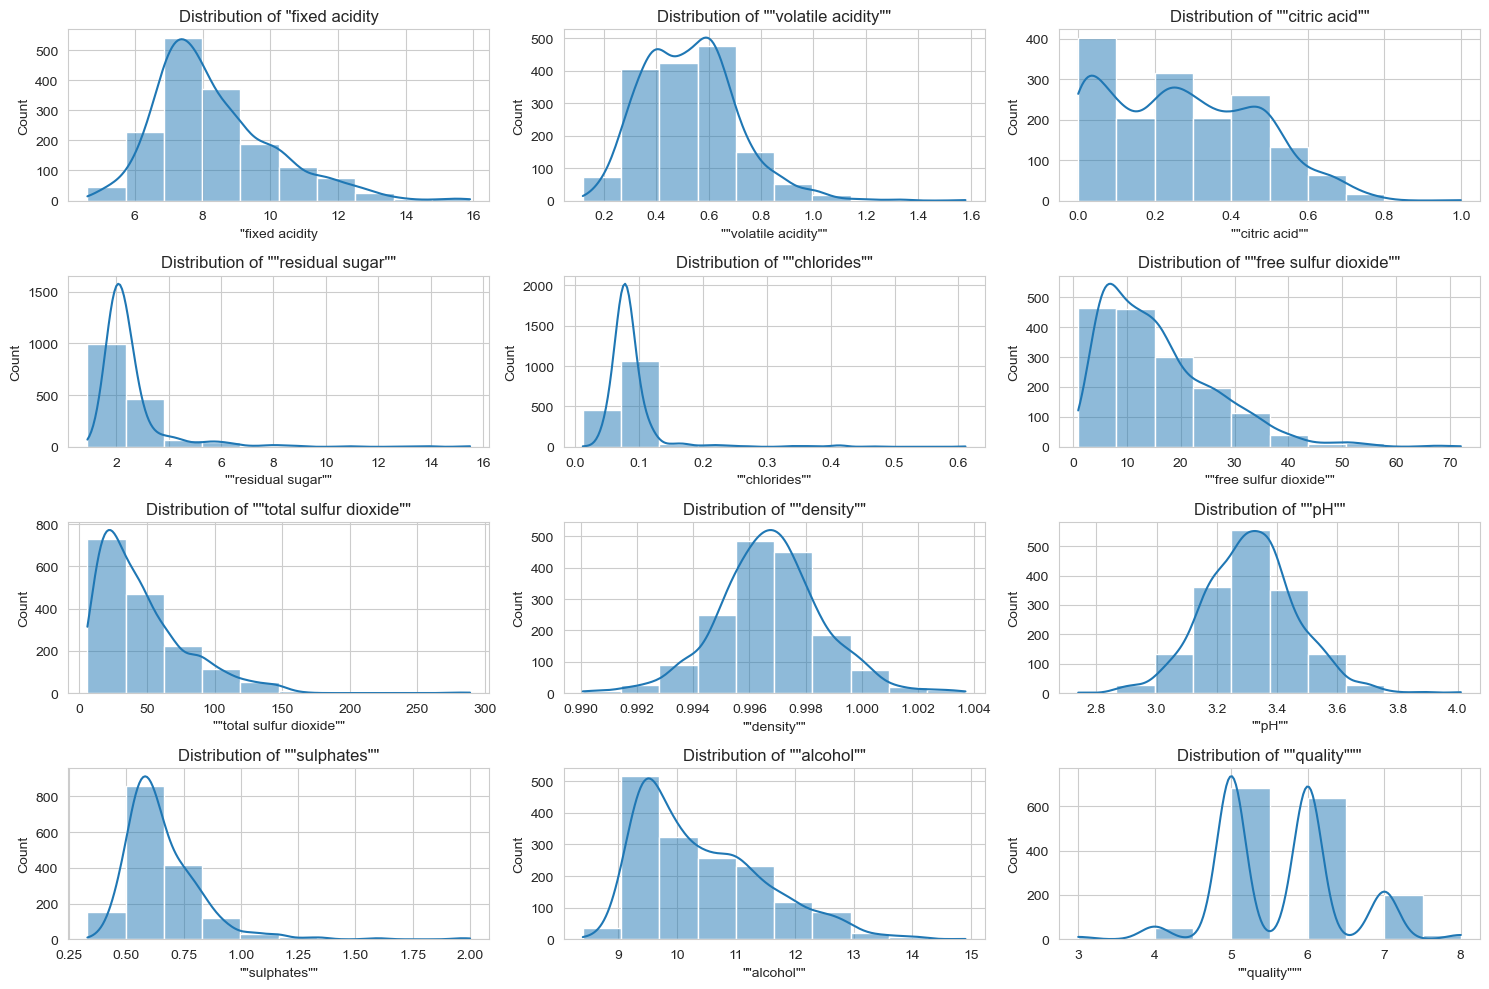

Boxplots of Features:


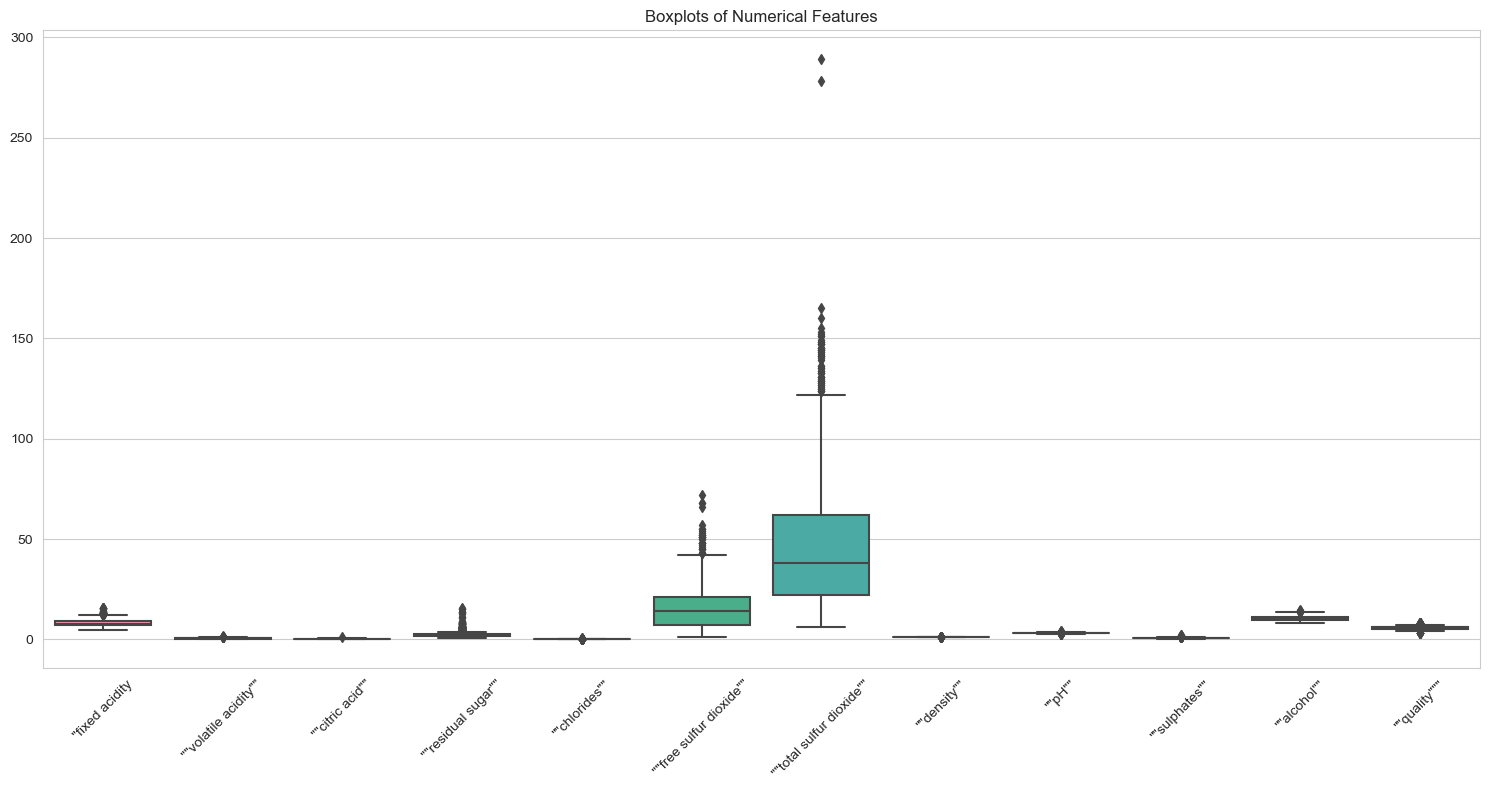

Correlation Matrix (Pearson Correlation):


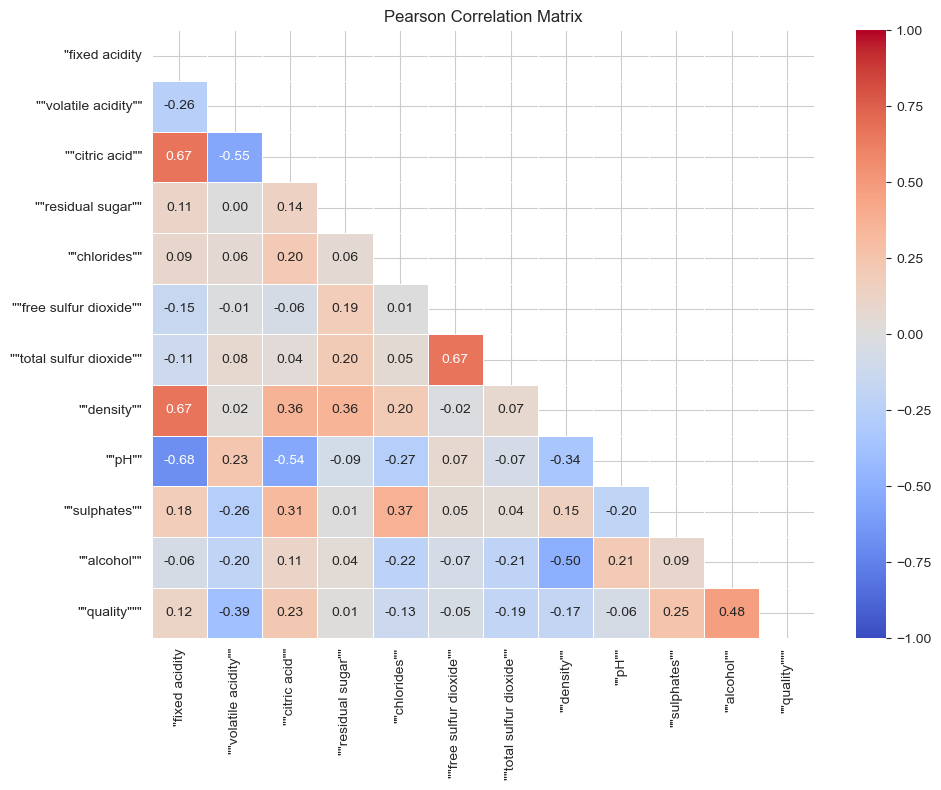

Pairplot of all features:


/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

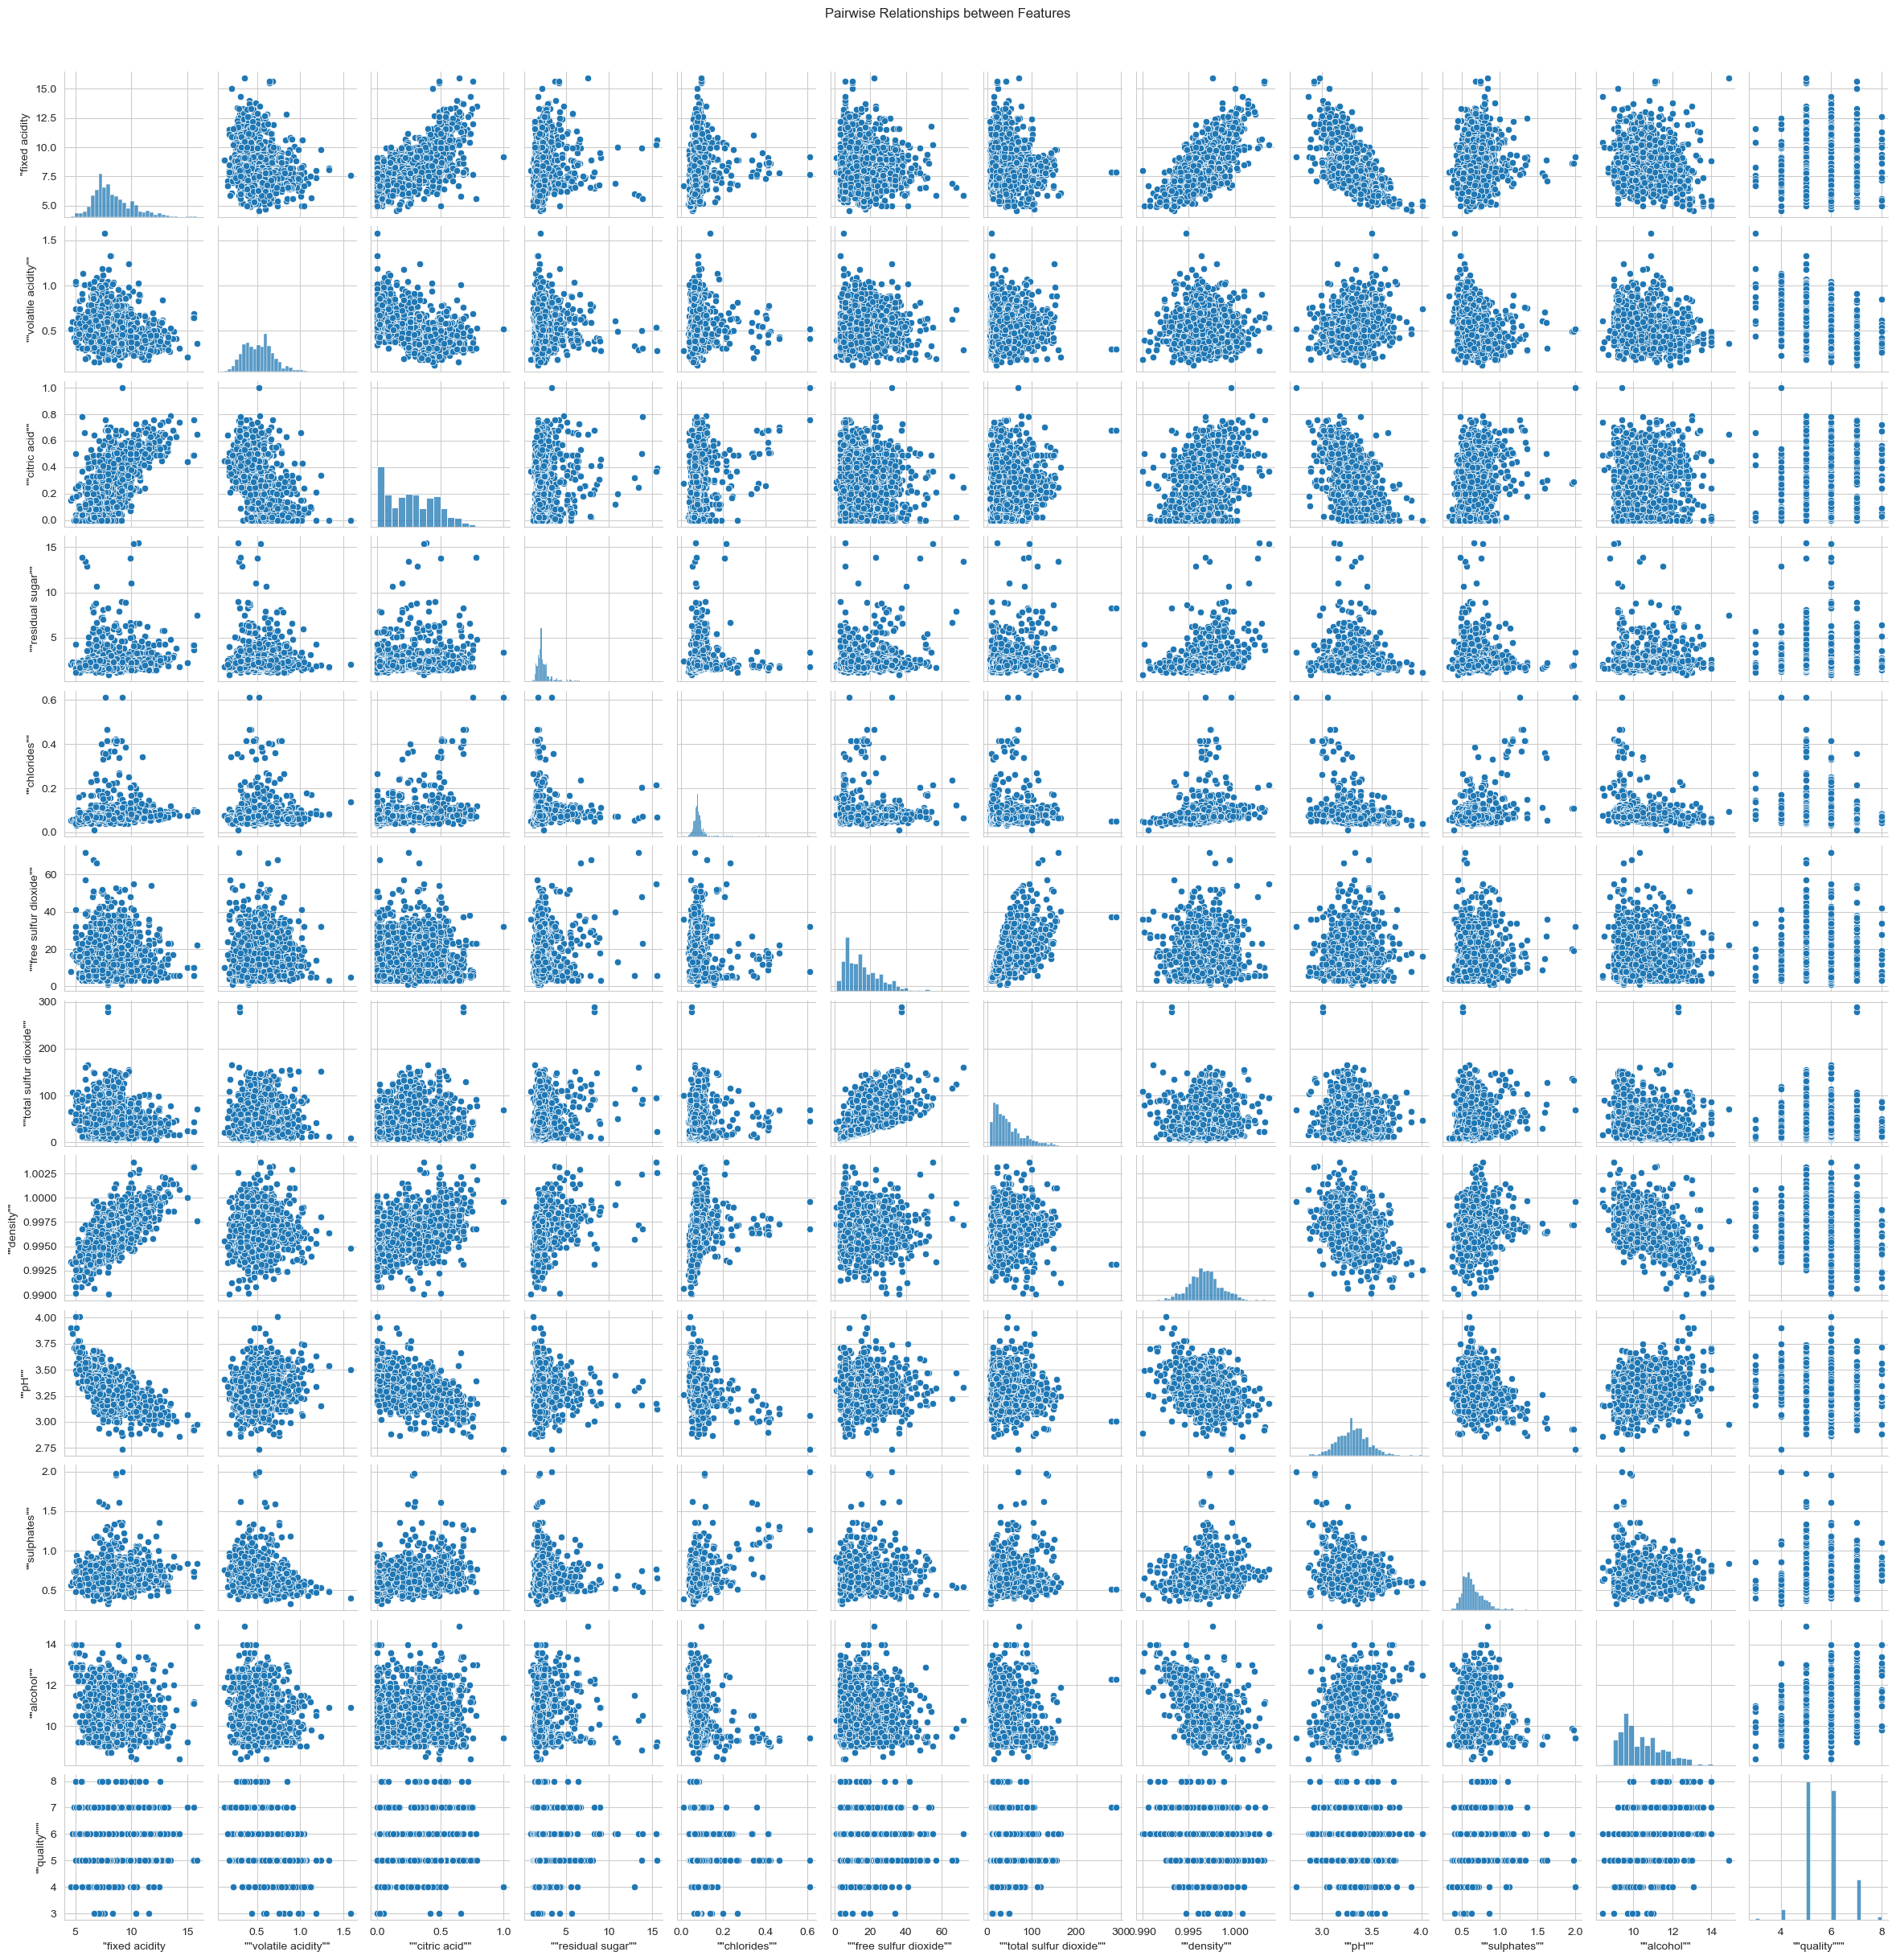

Categorical Distributions:


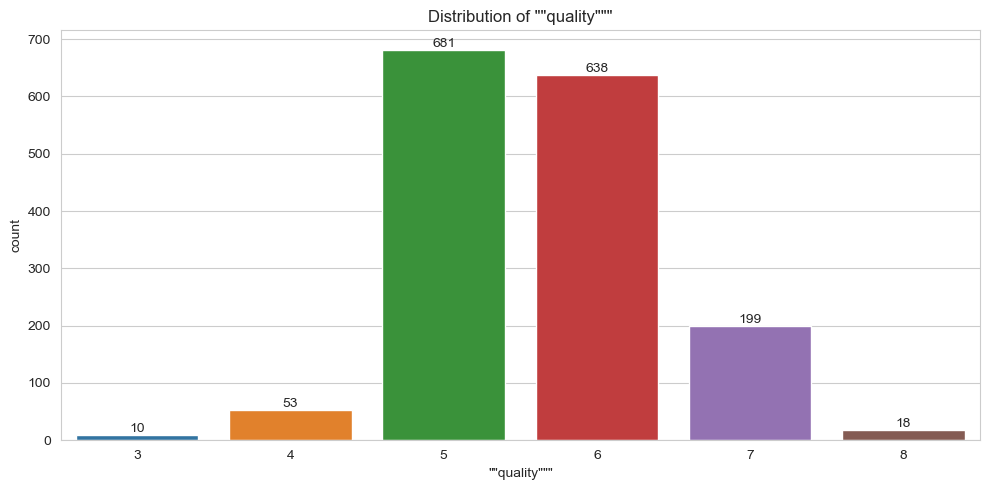

In [5]:
# Now let's use the class to explore the data
if 'df' in locals():
    explorer = DataExplorer(df)
    
    # Overall summary
    explorer.summary_statistics()
    
    # Distribution of each feature
    explorer.plot_histograms()
    
    # Boxplots to identify outliers
    explorer.plot_boxplots()
    
    # Correlation analysis
    corr_matrix = explorer.plot_correlation_matrix()
    
    # Plot relationships between most correlated features
    if 'quality' in df.columns:
        # For wine quality dataset specifically
        explorer.plot_pairplot(target_col='quality', n_features=4)
        explorer.explore_target_relationship(target_col='quality')
    else:
        # General case
        explorer.plot_pairplot()
    
    # Check categorical variables (if any)
    explorer.plot_categorical_distributions()
else:
    print("DataFrame 'df' not found. Please load the data first.")

In [6]:
# Add this code in a new cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

class WineQualityPredictor:
    """
    A class to handle training and evaluation of machine learning models
    for predicting wine quality.
    """
    
    def __init__(self, df, target_col='quality', test_size=0.2, random_state=42):
        """
        Initialize with a pandas DataFrame.
        
        Args:
            df: Pandas DataFrame containing the wine data
            target_col: Name of the target column (default: 'quality')
            test_size: Proportion of data to use for testing (default: 0.2)
            random_state: Random seed for reproducibility (default: 42)
        """
        self.df = df
        self.target_col = target_col
        self.test_size = test_size
        self.random_state = random_state
        self.models = {}
        self.results = {}
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    def preprocess_data(self):
        """
        Preprocess the data: split into features and target, perform train-test split.
        """
        print("Preprocessing data...")
        
        # Check if target column exists
        if self.target_col not in self.df.columns:
            raise ValueError(f"Target column '{self.target_col}' not found in the DataFrame")
        
        # Separate features and target
        X = self.df.drop(self.target_col, axis=1)
        y = self.df[self.target_col]
        
        # Print dataset information
        print(f"Dataset shape: {self.df.shape}")
        print(f"Features: {X.shape[1]} columns")
        print(f"Target distribution:\n{y.value_counts().sort_index()}")
        
        # Train-test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state, stratify=y
        )
        
        print(f"Training set size: {self.X_train.shape[0]} samples")
        print(f"Testing set size: {self.X_test.shape[0]} samples")
        
        # Convert target to integer if it's not already
        if self.y_train.dtype != 'int64':
            self.y_train = self.y_train.astype(int)
            self.y_test = self.y_test.astype(int)
            print("Converted target to integer type")
        
        return self
    
    def setup_models(self):
        """
        Set up machine learning models with pipelines and hyperparameter grids.
        """
        print("Setting up models...")
        
        # Support Vector Machine
        svm_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC(probability=True, random_state=self.random_state))
        ])
        
        svm_param_grid = {
            'svm__C': [0.1, 1, 10],
            'svm__gamma': ['scale', 'auto'],
            'svm__kernel': ['rbf', 'linear']
        }
        
        self.models['SVM'] = {
            'pipeline': svm_pipeline,
            'param_grid': svm_param_grid
        }
        
        # Random Forest
        rf_pipeline = Pipeline([
            ('rf', RandomForestClassifier(random_state=self.random_state))
        ])
        
        rf_param_grid = {
            'rf__n_estimators': [50, 100, 200],
            'rf__max_depth': [None, 10, 20],
            'rf__min_samples_split': [2, 5]
        }
        
        self.models['Random Forest'] = {
            'pipeline': rf_pipeline,
            'param_grid': rf_param_grid
        }
        
        # Neural Network
        nn_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('nn', MLPClassifier(random_state=self.random_state, max_iter=1000))
        ])
        
        nn_param_grid = {
            'nn__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'nn__alpha': [0.0001, 0.001, 0.01],
            'nn__activation': ['relu', 'tanh']
        }
        
        self.models['Neural Network'] = {
            'pipeline': nn_pipeline,
            'param_grid': nn_param_grid
        }
        
        # K-Nearest Neighbors
        knn_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier())
        ])
        
        knn_param_grid = {
            'knn__n_neighbors': [3, 5, 7, 9],
            'knn__weights': ['uniform', 'distance']
        }
        
        self.models['KNN'] = {
            'pipeline': knn_pipeline,
            'param_grid': knn_param_grid
        }
        
        # Decision Tree
        dt_pipeline = Pipeline([
            ('dt', DecisionTreeClassifier(random_state=self.random_state))
        ])
        
        dt_param_grid = {
            'dt__max_depth': [None, 10, 20, 30],
            'dt__min_samples_split': [2, 5, 10],
            'dt__criterion': ['gini', 'entropy']
        }
        
        self.models['Decision Tree'] = {
            'pipeline': dt_pipeline,
            'param_grid': dt_param_grid
        }
        
        return self
    
    def train_and_evaluate(self, cv=5):
        """
        Train models with cross-validation and evaluate on test set.
        
        Args:
            cv: Number of cross-validation folds (default: 5)
        """
        if self.X_train is None or self.y_train is None:
            raise ValueError("Data not preprocessed. Call preprocess_data() first.")
        
        for model_name, model_info in self.models.items():
            print(f"\nTraining {model_name}...")
            # Test model with default hyperparameters
            print(f"\nTesting {model_name} with default hyperparameters...")
            default_model = model_info['pipeline'].steps[-1][1]  # Extract model type (e.g., KNN, SVM)
            default_model.fit(self.X_train, self.y_train)
            y_pred_default = default_model.predict(self.X_test)
            default_accuracy = accuracy_score(self.y_test, y_pred_default)
            print(f"Default {model_name} Accuracy: {default_accuracy:.4f}")
            print("\nDefault Classification Report:")
            print(classification_report(self.y_test, y_pred_default))
            
            # Grid search with cross-validation
            grid = GridSearchCV(
                estimator=model_info['pipeline'],
                param_grid=model_info['param_grid'],
                cv=cv,
                scoring='accuracy',
                n_jobs=-1,
                verbose=1
            )
            
            grid.fit(self.X_train, self.y_train)
            
            # Best model and parameters
            best_model = grid.best_estimator_
            best_params = grid.best_params_
            
            # Predictions on test set
            y_pred = best_model.predict(self.X_test)
            
            # Evaluation metrics
            accuracy = accuracy_score(self.y_test, y_pred)
            report = classification_report(self.y_test, y_pred, output_dict=True)
            cm = confusion_matrix(self.y_test, y_pred)
            
            # Cross-validation scores
            cv_scores = cross_val_score(best_model, self.X_train, self.y_train, cv=cv, scoring='accuracy')
            
            # Store results
            self.results[model_name] = {
                'best_model': best_model,
                'best_params': best_params,
                'accuracy': accuracy,
                'report': report,
                'confusion_matrix': cm,
                'cv_scores': cv_scores
            }
            
            print(f"Best parameters: {best_params}")
            print(f"Test accuracy: {accuracy:.4f}")
            print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        
        return self
    
    def feature_importance(self):
        """
        Extract feature importance from models that support it (Random Forest).
        """
        if 'Random Forest' not in self.results:
            print("Random Forest model not found in results. Skip feature importance.")
            return
        
        # Get the Random Forest model
        rf_model = self.results['Random Forest']['best_model']
        
        # Extract the actual RandomForestClassifier from the pipeline
        if hasattr(rf_model, 'named_steps') and 'rf' in rf_model.named_steps:
            rf = rf_model.named_steps['rf']
            
            # Get feature importances
            importances = rf.feature_importances_
            feature_names = self.X_train.columns
            
            # Create DataFrame for plotting
            feature_importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values(by='Importance', ascending=False)
            
            # Plot
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
            plt.title('Feature Importance from Random Forest')
            plt.tight_layout()
            plt.show()
            
            return feature_importance_df
    
    def compare_models(self):
        """
        Compare model performances.
        """
        if not self.results:
            print("No results to compare. Train models first.")
            return
        
        # Extract accuracies
        model_names = list(self.results.keys())
        accuracies = [self.results[model]['accuracy'] for model in model_names]
        cv_means = [self.results[model]['cv_scores'].mean() for model in model_names]
        cv_stds = [self.results[model]['cv_scores'].std() for model in model_names]
        
        # Create comparison DataFrame
        comparison_df = pd.DataFrame({
            'Model': model_names,
            'Test Accuracy': accuracies,
            'CV Mean Accuracy': cv_means,
            'CV Std': cv_stds
        }).sort_values(by='Test Accuracy', ascending=False)
        
        print("Model performance comparison:")
        display(comparison_df)
        
        # Plot comparison
        plt.figure(figsize=(12, 6))
        
        # Bar plot
        x = np.arange(len(model_names))
        width = 0.35
        
        plt.bar(x - width/2, accuracies, width, label='Test Accuracy')
        plt.bar(x + width/2, cv_means, width, label='CV Mean Accuracy')
        
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.title('Model Performance Comparison')
        plt.xticks(x, model_names, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Plot confusion matrices
        for model_name, result in self.results.items():
            cm = result['confusion_matrix']
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                      xticklabels=sorted(self.y_test.unique()),
                      yticklabels=sorted(self.y_test.unique()))
            plt.title(f'Confusion Matrix - {model_name}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.tight_layout()
            plt.show()
        
        return comparison_df
    
    def predict_with_best_model(self, X_new=None):
        """
        Make predictions with the best performing model.
        
        Args:
            X_new: New data to predict on. If None, use test data.
        """
        if not self.results:
            raise ValueError("No models have been trained. Call train_and_evaluate() first.")
        
        # Find the best model based on test accuracy
        best_model_name = max(self.results, key=lambda k: self.results[k]['accuracy'])
        best_model = self.results[best_model_name]['best_model']
        
        print(f"Using best model: {best_model_name}")
        
        # Make predictions
        if X_new is None:
            X_new = self.X_test
            y_true = self.y_test
            y_pred = best_model.predict(X_new)
            
            print(f"Accuracy on test set: {accuracy_score(y_true, y_pred):.4f}")
            print("\nClassification Report:")
            print(classification_report(y_true, y_pred))
            
            return y_pred
        else:
            return best_model.predict(X_new)

In [ ]:
# Add this code in a new cell to train and evaluate the models

if 'df' in locals():
    # Check if quality is a categorical variable
    if '""quality"""' in df.columns:
        # Instantiate the wine quality predictor
        wine_predictor = WineQualityPredictor(df, target_col='""quality"""')
        
        # Data preprocessing
        wine_predictor.preprocess_data()
        
        # Setup models
        wine_predictor.setup_models()
        
        # Train and evaluate
        wine_predictor.train_and_evaluate()
        
        # Show feature importance
        wine_predictor.feature_importance()
        
        # Compare model performances
        comparison = wine_predictor.compare_models()
        
        # Make predictions with best model
        wine_predictor.predict_with_best_model()
    else:
        print("Target column 'quality' not found in the DataFrame.")
else:
    print("DataFrame 'df' not found. Please load the data first.")

Preprocessing data...
Dataset shape: (1599, 12)
Features: 11 columns
Target distribution:
""quality"""
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64
Training set size: 1279 samples
Testing set size: 320 samples
Setting up models...

Training SVM...

Testing SVM with default hyperparameters...
Default SVM Accuracy: 0.4813

Default Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.64      0.35      0.45       136
           6       0.43      0.84      0.57       128
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         3

    accuracy                           0.48       320
   macro avg       0.18      0.20      0.17       320
weighted avg       0.45      0.48      0.42       320

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Best parameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Test accuracy: 0.6406
Cross-validation accuracy: 0.6294 ± 0.0278

Training Random Forest...

Testing Random Forest with default hyperparameters...
Default Random Forest Accuracy: 0.6750

Default Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.76      0.73       136
           6       0.64      0.71      0.67       128
           7       0.70      0.53      0.60        40
           8       0.50      0.33      0.40         3

    accuracy                           0.68       320
   macro avg       0.43      0.39      0.40       320
weighted avg       0.65      0.68      0.66       320

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Best parameters: {'rf__max_depth': 20, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Test accuracy: 0.6813
Cross-validation accuracy: 0.6833 ± 0.0245

Training Neural Network...

Testing Neural Network with default hyperparameters...
Default Neural Network Accuracy: 0.5719

Default Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.61      0.76      0.68       136
           6       0.55      0.52      0.53       128
           7       0.46      0.33      0.38        40
           8       0.00      0.00      0.00         3

    accuracy                           0.57       320
   macro avg       0.27      0.27      0.27       320
weighted avg       0.54      0.57      0.55       320

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vanessazepeda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
